## SVM 
### Arief Saferman - 1806148656 
## .
### What is SVM? 
SVM adalah algoritma pada machine learning (termasuk supervised machine learning) yang dapat digunakan untuk masalah klasifikasi atau regresi. Algoritma ini menggunakan teknik yang disebut dengan kernel untuk mengubah data kita kemudian mentrasformasikan batas optimal antara kemungkinan antar data-data. Singkatnya, SVM melakukan beberapa transformasi data yang sangat kompleks, lalu mencari cara untuk memisahkan data kita berdasarkan label yang sudah kita tentukan. 
## . 
### Suport Vector Machine 
Support Vector Machine melakukan sebuah klasifikasi dengan menemukan hyperplane yang memaksimalkan margin antara dua kelas. Vektor (kasus) yang mendefenisikan hyperplane adalah vektor pendukung untuk melakukan sebuah klasifikasi. Algoritma ini nantinya akan mendefinisikan sebuah hyperplane yang optimal guna memaksimalkan margin agar dapat memisahlkan per tipe data secara linear dan non-linear. 

In [1]:
# Import seluruh library yang diperlukan 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('grayscale')
from sklearn.model_selection import GridSearchCV

### Fungsi Untuk Plotting 

In [2]:
# Fungsi plotBar untuk mengukur akurasi dari masing-masing kelas 
def PlotBar(yPred,  yTest):
    names = ['1', '2', '3']
    height = []
    for i in range(1, 4):
        pred = yPred == i
        real = yTest == i
        accuracy = np.sum(pred == real) / len(real) * 100.0
        height.append(accuracy)
    plt.bar(names, height)
    plt.suptitle('Classification Accuracy')
    plt.show()
    

# Fungsi average test dan train akurasi 
def PlotTrainTestAcc(listTrainAcc, listTestAcc, xLabel):
    ind = np.arange(len(listTrainAcc))
    width = 0.35
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_axes([0,0,1,1])
    diffTest = [listTestAcc[i]-listTrainAcc[i] for i in range(len(listTestAcc))]
    ax.bar(ind, listTrainAcc, width)
    ax.bar(ind, diffTest, width, bottom=listTrainAcc)
    
    ax.legend(labels=['Test', 'Train'])
    plt.xticks(ind, xLabel)
    plt.xlabel('Kernel Tuning')
    plt.ylabel('Percentage')
    ax.set_title('Average Test and Train Accuracy Comparison')

In [3]:
#Inisialisasi dataset seeds 
seeds = pd.read_csv(r'D:\Kuliah\Semester 6\Tugas\AI\seeds.csv')
print(seeds.head())

# Pisahkan variabel independen variabel dari dependen variabel 
# x = sebagai independen variabel  
# y = sebagai dependen variabel 
x = seeds.iloc[:, :-1]
y = seeds.iloc[:, 7]

    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  


### Set Parameter untuk SVM 
gamma = [0.1, 0.01, 0.0001, 0.00001] <br>
C = [1, 10, 100, 1000] <br>
Kernel = [Linear, RBF, Poly] 

In [4]:
param_grid = [{'kernel' : ['poly'], 'C' : (1, 10, 100, 1000), 'gamma' : (0.1, 0.01, 0.001, 0.0001)}]

In [5]:
param_grid

[{'kernel': ['poly'],
  'C': (1, 10, 100, 1000),
  'gamma': (0.1, 0.01, 0.001, 0.0001)}]

In [6]:
# Untuk best praktis dan konsistensi kita harus convert pandas dataframe ke numpy ndarray 
# hal ini karena library pandas dan sklearn dibangun di atas numpy array 
# Sehingga lebih bagus jika kita convert terlebih dahulu sebelum processing 
x = x.to_numpy()
y = y.to_numpy()

### Training and Fitting Model 

sekarang kita akan melakukan pembagian data pada data yang sudah di konversi ke ndarray (n-th dimensional array). Kita akan mengggunakan 50% data training dan 50% data testing. 

In [7]:
#import library SVC pada sklearn dan inisialisasi model algoritma SVM 
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 

# ubah kernel berdasarkan 3 pengujian masing-masing (linear, rbf, dan poly)
model_1 = SVC(kernel = 'poly')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [8]:
grid_search = GridSearchCV(model_1, param_grid, cv = 10, verbose = 10)
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 1/10; 1/16] END .............C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 2/10; 1/16] END .............C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 3/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 3/10; 1/16] END .............C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 4/10; 1/16] END .............C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 5/10; 1/16] END .............C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV 6/10; 1/16] START C=1, gamma=0.1, kernel=poly...............................
[CV 6/10; 1/16] END .............C=1, gamma=0.

[CV 5/10; 6/16] END ...........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 6/10; 6/16] START C=10, gamma=0.01, kernel=poly.............................
[CV 6/10; 6/16] END ...........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 7/10; 6/16] START C=10, gamma=0.01, kernel=poly.............................
[CV 7/10; 6/16] END ...........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 8/10; 6/16] START C=10, gamma=0.01, kernel=poly.............................
[CV 8/10; 6/16] END ...........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 9/10; 6/16] START C=10, gamma=0.01, kernel=poly.............................
[CV 9/10; 6/16] END ...........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 10/10; 6/16] START C=10, gamma=0.01, kernel=poly............................
[CV 10/10; 6/16] END ..........C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV 1/10; 7/16] START C=10, gamma=0.001, kernel=poly............................
[CV 1/10; 7/16] END ........

[CV 4/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 5/10; 13/16] START C=1000, gamma=0.1, kernel=poly...........................
[CV 5/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 6/10; 13/16] START C=1000, gamma=0.1, kernel=poly...........................
[CV 6/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 7/10; 13/16] START C=1000, gamma=0.1, kernel=poly...........................
[CV 7/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 8/10; 13/16] START C=1000, gamma=0.1, kernel=poly...........................
[CV 8/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 9/10; 13/16] START C=1000, gamma=0.1, kernel=poly...........................
[CV 9/10; 13/16] END .........C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV 10/10; 13/16] START C=1000, gamma=0.1, kernel=poly..........................
[CV 10/10; 13/16] END ......

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid=[{'C': (1, 10, 100, 1000),
                          'gamma': (0.1, 0.01, 0.001, 0.0001),
                          'kernel': ['poly']}],
             verbose=10)

In [9]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

### Tuning hyperparameter dengan GridSearchCV 
Hyperparameter merupakan sebuah parameter yang ingin kita optimasi untuk mendapatkan akurasi terbaik. Dalam modul sci-kit learn mereka merupakan sebuah argumen dalam konstruktor fungsi gridsearchcv. Pencarian dengan gridsearch ini menggunakan pendekatan set-up hyper-parameter secara metodologi akan membangun dan mengevaluasi model untuk setiap kombinasi parameter algoritma yang ditentukan dalam sebuah grid. <br> 
<br> 
GridSearchCN membantu kita untuk menggabungkan estimator dengan pembukaan pencarian grid untuk tuning hyper-parameter. <br>
<br> 
Dalam melakukan tuning hyper-parameter, ada beberapa parameter yang harus dituning. Diantaranya adalah: 
- Kernels, fungsi utama dari kernel adalah mengambil ruang input dimensi rendah dan mengubahnya menjadi ruang berdimensi lebih tinggi. Parameter ini sebagian besar berguna dalam masalah klasifikasi non-linear. 
<img src = "https://miro.medium.com/max/1380/1*AFqQio7ZB91FZvFtuYAn-w.png" />
- C (Regularization), merupakan sebuah parameter penalty yang merepresentasikan kesalahan klasifikasi atau error. Kesalahan klasifikasi atau error memberi tahu kita tentang pengoptimalasan SVM seberapa banyak kesalahan yang dapat ditanggung. Hal ini akan memberikan kita kontrol untuk trade-off antara batas keputusan dan error klasifikasi. 
<img src = "https://miro.medium.com/max/1000/0*08KrYhXpVQdUXWrX"/> 
ketika C diberikan nilai yang tinggi, algoritma tersebut akan mengklasifikasikan data point secara benar, tetapi juga ada kemungkinan algoritma tersebut akan overfitting 
- Gamma, parameter yang menentukan seberapa jauh pengaruh kalkulasi kita terhadap garis pemisah yang masih masuk akal 
<img src = "https://miro.medium.com/max/1713/1*6HVomcqW7BWuZ2vvGOEptw.png" /> 
Ketika gamma memilih nilai yang besar, data poin terdekat akan memiliki pengaruh lebih besar. Ketika gamma memiliki nilai yang kecil maka data poin yang memiliki jarak jauh untuk menentukan decision boundary <br> 
<br> 

[Referensi](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/)

### Gunakan parameter terbaik yang sudah dihasilkan oleh GridSearchCV  dengan tuning parameter 

In [10]:
model_1 = SVC(C=100, kernel='linear', degree=3, gamma=0.1, coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)

In [11]:
# Lakukan training pada model yang sudah di inisiasi di atas menggunakan fit function 
model_1.fit(x_train, y_train)

SVC(C=100, gamma=0.1, kernel='linear', random_state=0, verbose=0)

In [12]:
# Lakukan testing pada model yang sudah di training 
pred = model_1.predict(x_test)

In [13]:
# Import library untuk akurasi testing 
from sklearn.metrics import accuracy_score 
acc1a = model_1.score(x_test, y_test) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_1.score(x_train, y_train) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_1.score(x_test, y_test) * 100))
print('Accuracy of linear SVC on test set: %.2f' % (acc1a))


Accuracy of linear SVC on training set: 98.99
Accuracy of linear SVC on test set: 98.00


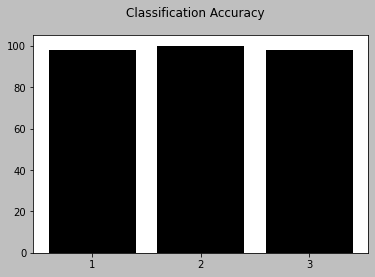

In [14]:
PlotBar(pred, y_test)

Confusion matrix, without normalization
[[24  3  2]
 [ 0 37  0]
 [ 2  0 32]]
Normalized confusion matrix
[[0.82758621 0.10344828 0.06896552]
 [0.         1.         0.        ]
 [0.05882353 0.         0.94117647]]


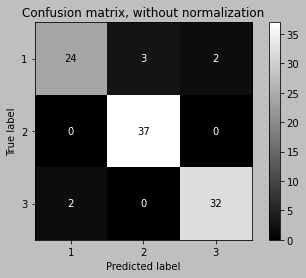

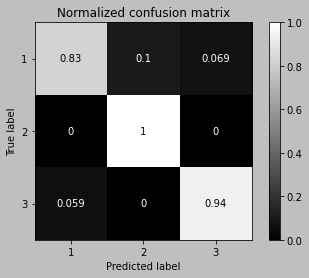

In [49]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix1a = plot_confusion_matrix(model_1, x_test, y_test, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix1a.ax_.set_title(title)
     print(title)
     print(matrix1a.confusion_matrix)
plt.show()

### Cross Validation swap data test dan train

In [16]:
model_1.fit(x_test, y_test)

SVC(C=100, gamma=0.1, kernel='linear', random_state=0, verbose=0)

In [17]:
pred = model_1.predict(x_train)

In [18]:
acc1b = model_1.score(x_train, y_train) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_1.score(x_test, y_test) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_1.score(x_train, y_train) * 100))
print('Accuracy of linear SVC on test set: %.2f' % (acc1b))

Accuracy of linear SVC on training set: 99.00
Accuracy of linear SVC on test set: 89.90


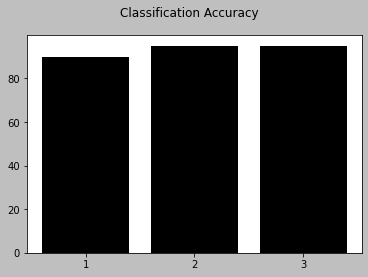

In [19]:
PlotBar(pred, y_train)

Confusion matrix, without normalization
[[35  0  2]
 [ 2 29  0]
 [ 0  0 31]]
Normalized confusion matrix
[[0.94594595 0.         0.05405405]
 [0.06451613 0.93548387 0.        ]
 [0.         0.         1.        ]]


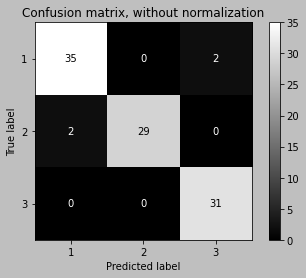

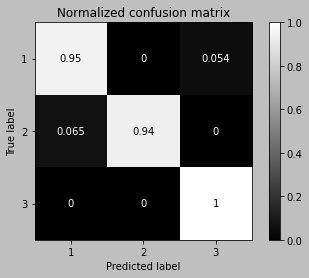

In [50]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix1b = plot_confusion_matrix(model_1, x_train, y_train, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix1b.ax_.set_title(title)
     print(title)
     print(matrix1b.confusion_matrix)
plt.show()

## Analisis Model pertama 

Di model pertama ini saya gunakan sebuah kernel linear pada model saya. Hasilnya hyperplane linear bekerja cukup baik pada data seeds ini dimana terlihat akurasi berada di 95% dimasing-masing tiap kelasnya pada model linear ini. 

### Variasi Uji Coba Ke-2 
#### Uji Coba dengan kernel RBF 

In [21]:
model_2 = SVC(C=100, kernel='rbf', degree=3, gamma=0.01, coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

model_2.fit(x_train, y_train)
pred = model_2.predict(x_test)

acc2a = model_2.score(x_test, y_test) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_2.score(x_train, y_train) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_2.score(x_test, y_test) * 100))

print('Accuracy of linear SVC on test set: %.2f' % (acc2a))

Accuracy of linear SVC on training set: 95.96
Accuracy of linear SVC on test set: 90.00


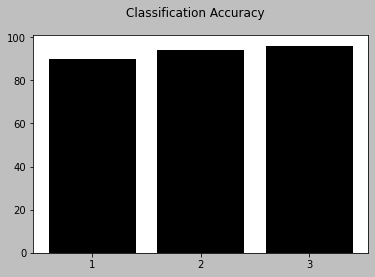

In [22]:
PlotBar(pred, y_test)

Confusion matrix, without normalization
[[28  0  1]
 [ 0 37  0]
 [ 4  0 30]]
Normalized confusion matrix
[[0.96551724 0.         0.03448276]
 [0.         1.         0.        ]
 [0.11764706 0.         0.88235294]]


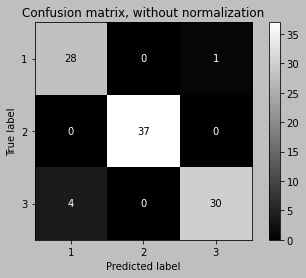

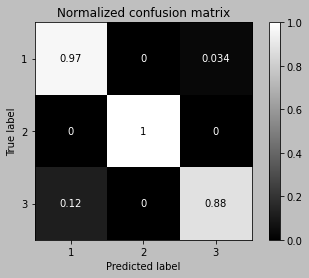

In [51]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix2a = plot_confusion_matrix(model_2, x_test, y_test, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix2a.ax_.set_title(title)
     print(title)
     print(matrix2a.confusion_matrix)
plt.show()

### Swab Data 


In [24]:
model_2.fit(x_test, y_test)
pred = model_2.predict(x_train)

acc2b = model_2.score(x_train, y_train) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_2.score(x_test, y_test) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_2.score(x_train, y_train) * 100))

print('Accuracy of linear SVC on test set: %.2f' % (acc2b))

Accuracy of linear SVC on training set: 94.00
Accuracy of linear SVC on test set: 93.94


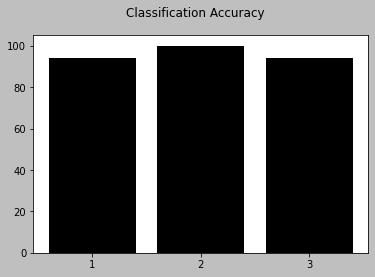

In [25]:
PlotBar(pred, y_train)

Confusion matrix, without normalization
[[33  3  1]
 [ 1 30  0]
 [ 2  0 29]]
Normalized confusion matrix
[[0.89189189 0.08108108 0.02702703]
 [0.03225806 0.96774194 0.        ]
 [0.06451613 0.         0.93548387]]


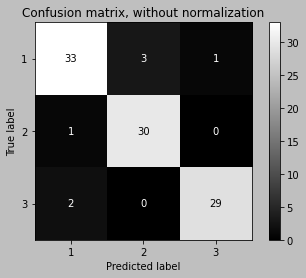

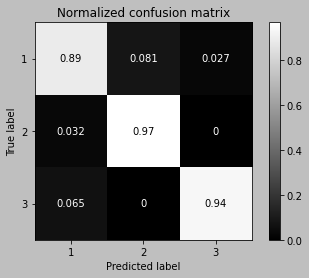

In [52]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix2b = plot_confusion_matrix(model_2, x_train, y_train, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix2b.ax_.set_title(title)
     print(title)
     print(matrix2b.confusion_matrix)
plt.show()

### Variasi Uji Coba Ke-3
#### uji coba dengan kernel polinomial 

In [27]:
model_3 = SVC(C=1, kernel='poly', degree=3, gamma=0.01, coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

model_3.fit(x_train, y_train)
pred = model_3.predict(x_test)

acc3a = model_3.score(x_test, y_test) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_3.score(x_train, y_train) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_3.score(x_test, y_test) * 100))

print('Accuracy of linear SVC on test set: %.2f' % (acc3a))

Accuracy of linear SVC on training set: 91.92
Accuracy of linear SVC on test set: 92.00


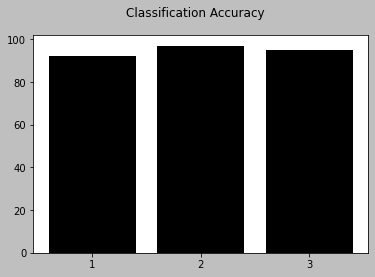

In [28]:
PlotBar(pred, y_test)

Confusion matrix, without normalization
[[27  0  2]
 [ 1 36  0]
 [ 1  0 33]]
Normalized confusion matrix
[[0.93103448 0.         0.06896552]
 [0.02702703 0.97297297 0.        ]
 [0.02941176 0.         0.97058824]]


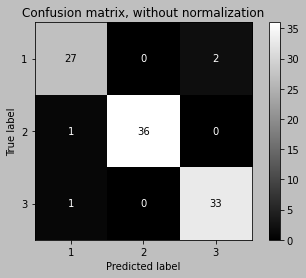

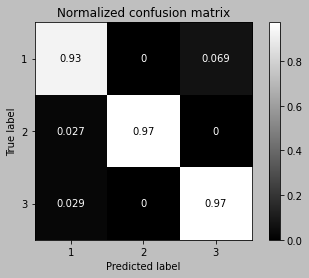

In [53]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix3a = plot_confusion_matrix(model_3, x_test, y_test, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix3a.ax_.set_title(title)
     print(title)
     print(matrix3a.confusion_matrix)
plt.show()

### Swab Data 

In [30]:
model_3.fit(x_test, y_test)
pred = model_3.predict(x_train)

acc3b = model_3.score(x_train, y_train) * 100
print('Accuracy of linear SVC on training set: {:.2f}'.format(model_3.score(x_test, y_test) * 100))
# print('Accuracy of linear SVC on test set: {:.2f}'.format(model_3.score(x_train, y_train) * 100))
# acc3b = "{:.2f}".format(acc3b)
print('Accuracy of linear SVC on test set: %.2f' % (acc3b))

Accuracy of linear SVC on training set: 96.00
Accuracy of linear SVC on test set: 85.86


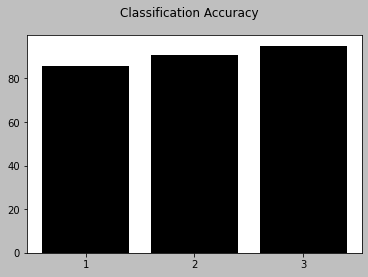

In [31]:
PlotBar(pred, y_train)

Confusion matrix, without normalization
[[27  5  5]
 [ 4 27  0]
 [ 0  0 31]]
Normalized confusion matrix
[[0.72972973 0.13513514 0.13513514]
 [0.12903226 0.87096774 0.        ]
 [0.         0.         1.        ]]


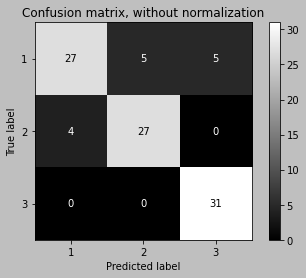

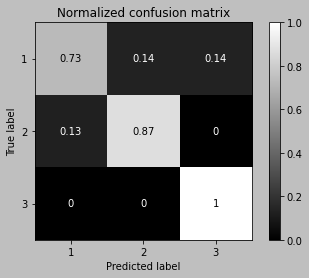

In [54]:
from sklearn.metrics import plot_confusion_matrix 
class_names = ['1', '2', '3']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
     matrix3b = plot_confusion_matrix(model_3, x_train, y_train, display_labels = class_names, 
                                  cmap = plt.cm.gray, normalize = normalize)
     matrix3b.ax_.set_title(title)
     print(title)
     print(matrix3b.confusion_matrix)
plt.show()

### Visualie Dataset 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h = .02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy 

In [34]:
def plot_contours(ax, clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params)
    return out 

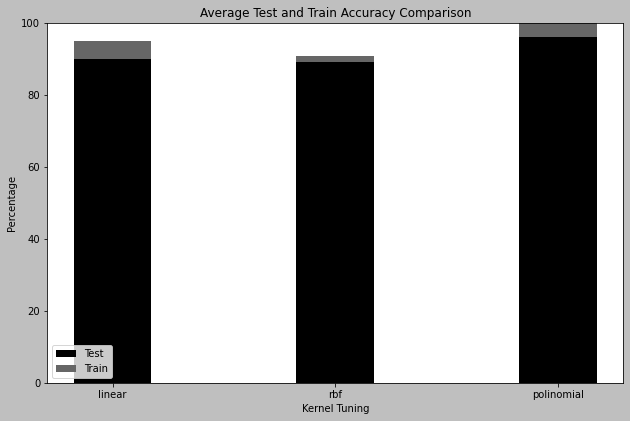

In [35]:
# Masukkan Hasil list train, test, dan xLabel dalam list 
train = [94.95, 90.91, 100.00]
test = [90.00,  89.00, 96.00] 
xlabel = ['linear', 'rbf', 'polinomial'] 

PlotTrainTestAcc(train, test, xlabel)

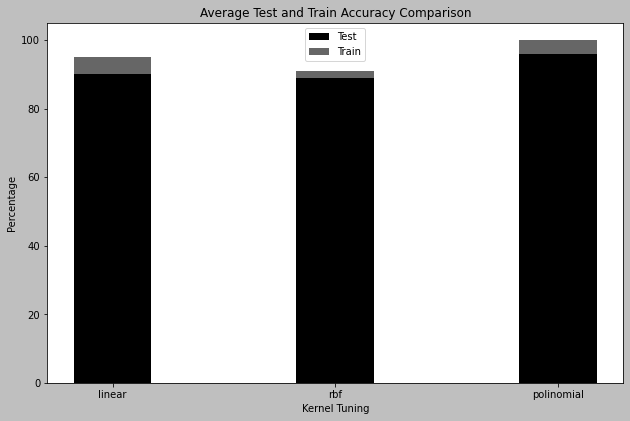

In [55]:
xlabel = ['linear', 'rbf', 'polinomial'] 

PlotTrainTestAcc(test, train, xlabel)

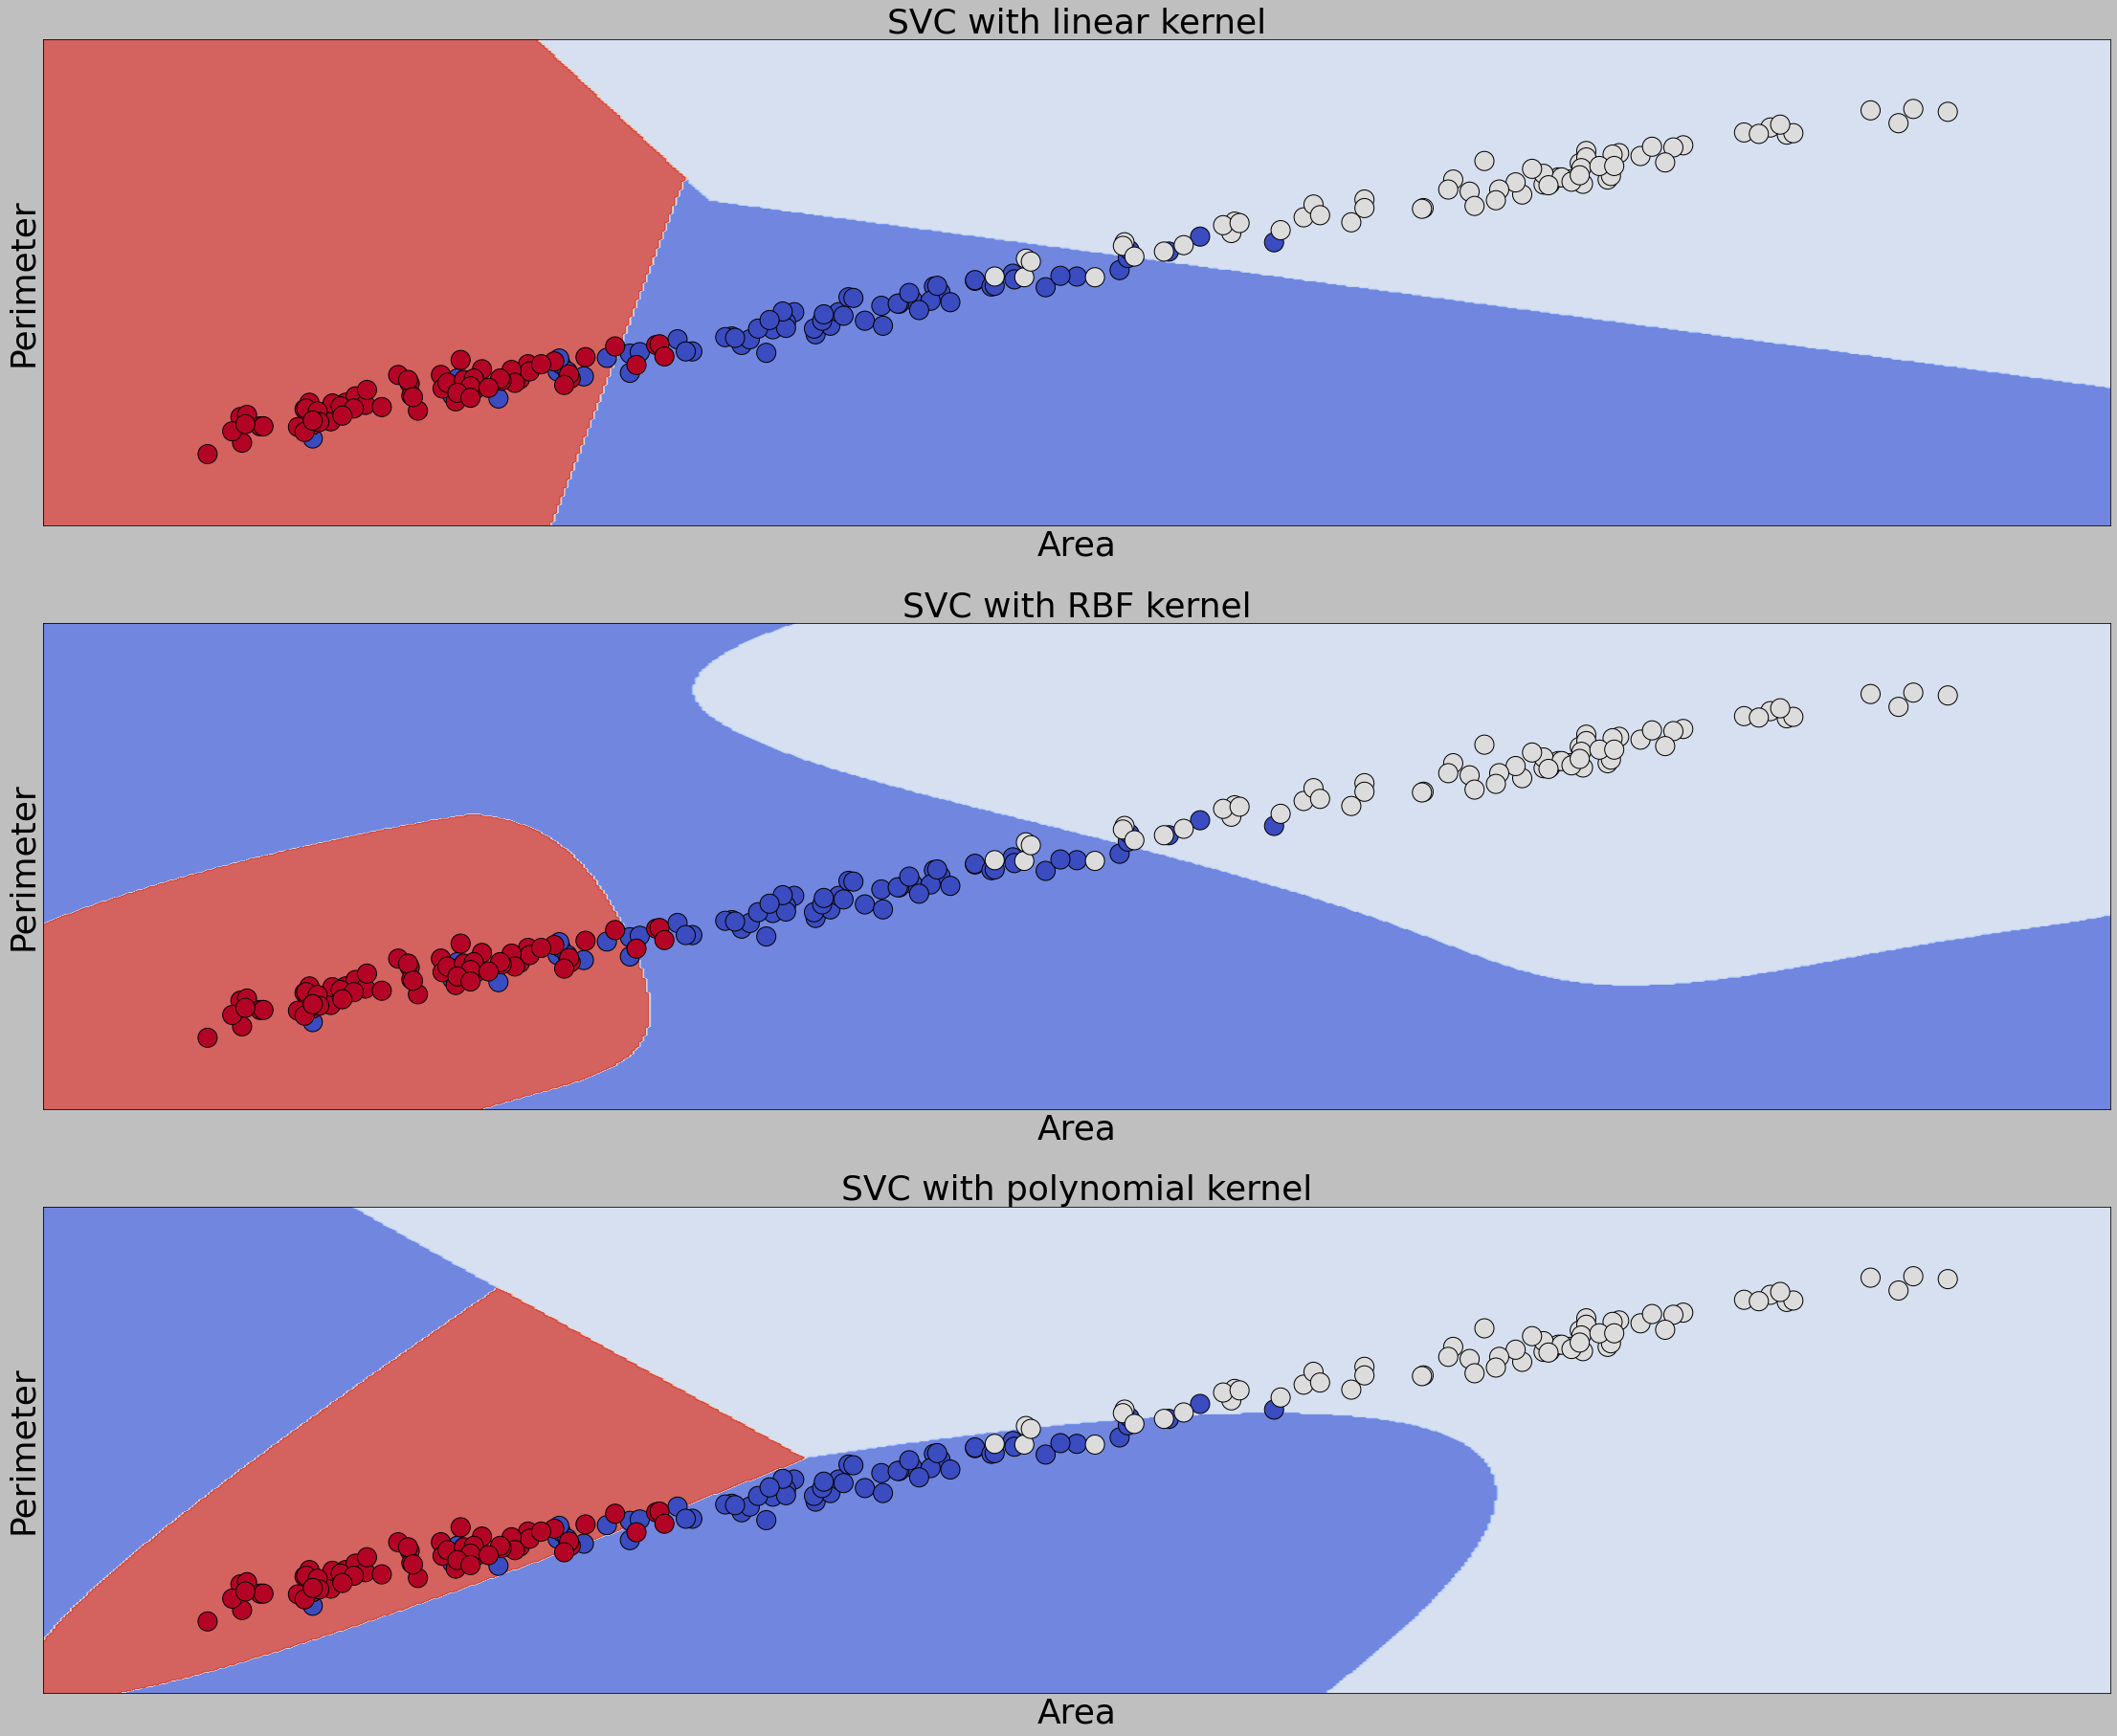

In [36]:
x = seeds.iloc[:, :2]
y = seeds.iloc[:, 7]

c = 1.0 
models = (svm.SVC(kernel = 'linear', C = c), 
         svm.SVC(kernel = 'rbf', gamma = 'auto', C = c), 
         svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C = c))

models = (clf.fit(x, y) for clf in models)

titles = ('SVC with linear kernel', 
         'SVC with RBF kernel', 
         'SVC with polynomial kernel')

fig, sub = plt.subplots(3)
plt.subplots_adjust(left = 5, right = 10, bottom = 4, top = 10)

x0, x1 = x.iloc[:, 0], x.iloc[:, 1]
xx, yy = make_meshgrid(x0, x1)

c_map = cmap = plt.cm.coolwarm 
for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap = c_map, alpha = 0.8)
    ax.scatter(x0, x1, c = y, cmap = c_map, s = 400, edgecolors = 'k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Area', fontsize = 36)
    ax.set_ylabel('Perimeter', fontsize = 36)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title, fontsize = 36)

plt.show()

In [46]:
# seeds = pd.read_csv(r'D:\Kuliah\Semester 6\Tugas\AI\seeds.csv')
x = seeds.iloc[:, :-1]
colu = df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
col = colu.columns

dout = x 
dout['Type'] = model_1.predict(x)
print(dout)
dout.to_csv('SVM.csv')

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.825     1  
3              2.25

## Plotting bar tiap kelas 

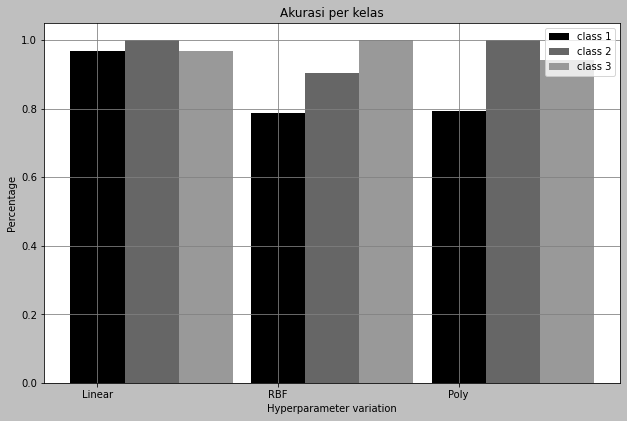

In [38]:
data1a = [matrix1a.confusion_matrix[0][0],
          matrix2a.confusion_matrix[0][0], 
          matrix3a.confusion_matrix[0][0]]

data2a = [matrix1a.confusion_matrix[1][1],
          matrix2a.confusion_matrix[1][1], 
          matrix3a.confusion_matrix[1][1]]

data3a = [matrix1a.confusion_matrix[2][2],
          matrix2a.confusion_matrix[2][2], 
          matrix3a.confusion_matrix[2][2]]

width = 0.3
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder = 0, color = 'gray')

# Show data in plots
ax.bar(np.arange(len(data1a)), data1a, width=width)
ax.bar(np.arange(len(data2a))+ width, data2a, width=width)
ax.bar(np.arange(len(data3a))+ 2*width, data3a, width=width)

# add axis labels
xLabel = ['Linear', 'RBF', 'Poly']

ax.legend(labels=['class 1', 'class 2', 'class 3'])
plt.xticks(np.arange(len(data1a)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas')

plt.show()

## Plotting bar tiap kelas swap data

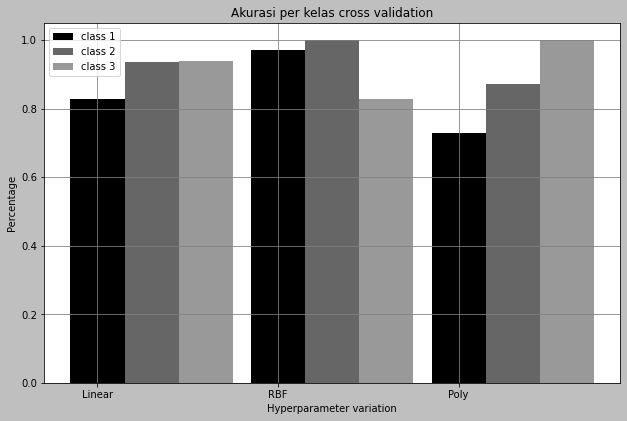

In [47]:
data1a = [matrix1b.confusion_matrix[0][0],
          matrix2b.confusion_matrix[0][0], 
          matrix3b.confusion_matrix[0][0]]

data2a = [matrix1b.confusion_matrix[1][1],
          matrix2b.confusion_matrix[1][1], 
          matrix3b.confusion_matrix[1][1]]

data3a = [matrix1b.confusion_matrix[2][2],
          matrix2b.confusion_matrix[2][2], 
          matrix3b.confusion_matrix[2][2]]

width = 0.3
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder = 0, color = 'gray')

# Show data in plots
ax.bar(np.arange(len(data1a)), data1a, width=width)
ax.bar(np.arange(len(data2a))+ width, data2a, width=width)
ax.bar(np.arange(len(data3a))+ 2*width, data3a, width=width)

# add axis labels
xLabel = ['Linear', 'RBF', 'Poly']

ax.legend(labels=['class 1', 'class 2', 'class 3'])
plt.xticks(np.arange(len(data1a)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas cross validation')

plt.show()

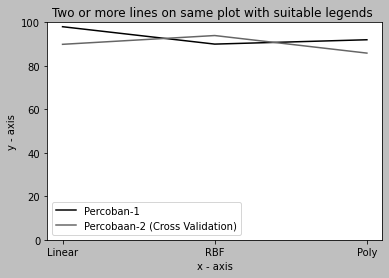

In [45]:
import matplotlib.pyplot as plt
# line 1 points
x1 = ['Linear','RBF','Poly']
y1 = [acc1a,acc2a,acc3a]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Percoban-1")
# line 2 points

y2 = [acc1b,acc2b,acc3b]
# plotting the line 2 points 
plt.plot(x1, y2, label = "Percobaan-2 (Cross Validation)")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.ylim(bottom=0, top=100)
plt.show()
